In [1]:
import pandas as pd
import numpy as np

from scipy.stats import norm
import math

In [2]:
data = pd.read_csv("moving_average.csv")

In [3]:
data=data.rename(columns={'FYO_growh':'Divedend_yield_growth'})

accuracy check

In [4]:
data1=data.loc[:319,:]

In [5]:
shuffled_list=[]

In [6]:
for i in range(30):
    shuffled_list.append(np.random.permutation(len(data1)))

In [7]:
def split_train_test(data, test_ratio,i):
    test_set_size = int(len(data1) * test_ratio)
    test_indices = shuffled_list[i][:test_set_size]
    train_indices = shuffled_list[i][test_set_size:]

    return data1.iloc[train_indices], data1.iloc[test_indices]

In [8]:

temp_column = ['name','win_prob', 'loss_prob', 'result']

win_lose_cal = pd.DataFrame(columns=temp_column)

accuracy_model_list = []


for k in range(30):
    train_set, test_set = split_train_test(data1, 0.3, k)
    
    columns = list(train_set.columns)

    columns.remove('Name')
    columns.remove('Date')
    columns.remove('W/L')
    columns.remove('MA')
    columns.remove('Index_value')
    
    
    win_group = train_set[train_set['W/L'] == 1]
    
    win_group_result = pd.DataFrame(columns=columns)

    lose_group = train_set[train_set['W/L'] == 0]
    
    lose_group_result = pd.DataFrame(columns=columns)
    
    mean_list_win = []
    
    std_list_win = []
    
    for column in columns:
        mean_list_win.append(win_group[column].mean()) #mean 추가
        std_list_win.append(win_group[column].std()) #std 추가


    win_group_result.loc[0] = mean_list_win
    win_group_result.loc[1] = std_list_win

    
    mean_list_lose = []
    
    std_list_lose = []

    for column in columns:
        mean_list_lose.append(lose_group[column].mean()) #mean 추가
        std_list_lose.append(lose_group[column].std()) #std 추가
    
    lose_group_result.loc[0] = mean_list_lose
    lose_group_result.loc[1] = std_list_lose
    
    win_group_result['category'] = ['mean', 'std']
    lose_group_result['category'] = ['mean', 'std']
    
    columns.insert(0,'category')
    
    win_group_result = win_group_result[columns]
    lose_group_result = lose_group_result[columns]

    
    
    for i in range(len(test_set)):
    
        temp_col = []
    
        test = test_set.iloc[i][4:-1]
    
        temp_col.append(test_set.iloc[i][0]) # 이름 추가
    
        result = 1

    
        for j in range(len(test)):
            prob = norm.pdf(test[j], win_group_result.iloc[0, j+1], win_group_result.iloc[1, j+1])
            result *= prob
    
        try:
            win_prob = math.log(len(test_set[test_set['W/L']==1])/len(test_set)*result)
        except:
            print(result)
            win_prob = -math.inf
        
        temp_col.append(win_prob) # 이길 확률 추가.
    
        result=1
    
        for j in range(len(test)):
            prob = norm.pdf(test[j], lose_group_result.iloc[0, j+1], lose_group_result.iloc[1, j+1])
            result *= prob
    
        try:
            lose_prob = math.log(len(test_set[test_set['W/L']==0])/len(test_set)*result)
        except:
            print(result)
            lose_prob = -math.inf
        
        temp_col.append(lose_prob) # 질 확률 추가.
    
        # WIN/LOSE 추가
        if win_prob > lose_prob:
            temp_col.append(1)
        elif win_prob < lose_prob:
            temp_col.append(0)
        else:
            temp_col.append('Draw')
        
    
        win_lose_cal.loc[i] = temp_col
        
    a=pd.DataFrame(list(win_lose_cal['result']))
    b=pd.DataFrame(list(test_set['W/L']))
    guess = a == b
    correct_guess=sum(guess.iloc[:,-1])
    wrong_guess=len(guess)-correct_guess
    accuracy_model=correct_guess/len(test_set)
    
    accuracy_model_list.append(accuracy_model)
    
    
accuracy=pd.DataFrame(accuracy_model_list)
accuracy

0.0


,0
0,0.541667
1,0.500000
2,0.541667
3,0.593750
4,0.531250
5,0.531250
6,0.510417
7,0.614583
8,0.531250
9,0.541667


In [9]:
np.mean(accuracy)

0    0.564583
dtype: float64

추정1: 2016년 2분기 공시 사용

In [10]:
#trainning
data1=data.loc[:320,:]
data1_test=data.loc[321:328,:]
#trainning

# column list로 구하기.
columns = list(data1.columns)

# 필요없는 column 삭제
columns.remove('Name')
columns.remove('Date')
columns.remove('MA')
columns.remove('Index_value')
columns.remove('W/L')

mean_list_win_test = []
std_list_win_test = []
mean_list_lose_test = []
std_list_lose_test = []

#win
win_group_result = pd.DataFrame(columns=columns)

win_group = data1[data1['W/L'] == 1]


for column in columns:
    mean_list_win_test.append(win_group[column].mean())
    std_list_win_test.append(win_group[column].std()) 


win_group_result.loc[0] = mean_list_win_test
win_group_result.loc[1] = std_list_win_test


win_group_result['category'] = ['mean', 'std']



#lose
lose_group_result = pd.DataFrame(columns=columns)

lose_group = data1[data1['W/L'] == 0]

for column in columns:
    mean_list_lose_test.append(lose_group[column].mean()) 
    std_list_lose_test.append(lose_group[column].std()) 

lose_group_result.loc[0] = mean_list_lose_test
lose_group_result.loc[1] = std_list_lose_test

    
lose_group_result['category'] = ['mean', 'std']


columns.insert(0,'category')



win_group_result = win_group_result[columns]
lose_group_result = lose_group_result[columns]


#test



result = 1

temp_column = ['name','win_prob', 'loss_prob', 'result']

win_lose_cal = pd.DataFrame(columns=temp_column)

for i in range(len(data1_test)):
    
    temp_col = []
    
    test = data1_test.iloc[i][4:-1]
    
    temp_col.append(data1_test.iloc[i][0]) # 이름 추가
    
    result = 1
    
    for j in range(len(test)):
        prob = norm.pdf(test[j], win_group_result.iloc[0, j+1], win_group_result.iloc[1, j+1])
        result *= prob
    
    try:
        win_prob = math.log(len(data1[data1['W/L']==1])/len(data1)*result)
    except:
        print(result)
        win_prob = -math.inf
        
    temp_col.append(win_prob) # 이길 확률 추가.
    
    result = 1
    
    for j in range(len(test)):
        prob = norm.pdf(test[j], lose_group_result.iloc[0, j+1], lose_group_result.iloc[1, j+1])
        result *= prob
    
    try:
        lose_prob = math.log(len(data1[data1['W/L']==0])/len(data1)*result)
    except:
        print(result)
        lose_prob = -math.inf
        
    temp_col.append(lose_prob) # 질 확률 추가.
    
    if win_prob > lose_prob:
        temp_col.append(1)
    elif win_prob < lose_prob:
        temp_col.append(0)
    else:
        temp_col.append('Draw')
        
    
    win_lose_cal.loc[i] = temp_col


win_lose_cal


,name,win_prob,loss_prob,result
0,7_4,-134.775693,-54.002338,0
1,7_5,-59.881743,-43.086711,0
2,7_6,-33.845947,-31.368377,0
3,7_7,-33.907451,-31.226930,0
4,7_8,-77.231502,-62.065117,0
5,7_9,-27.925598,-27.859549,0
6,7_10,-27.058486,-28.060639,1
7,7_11,-56.509562,-46.831896,0


In [11]:
w1=data[data['Name']=='7_10'].iloc[0,3]

In [12]:
cf0=sum(list(data.iloc[321:327,:].Index_value))
cf0=cf0*10
cf0

443068.1

In [13]:
c1=cf0-int(cf0/w1)*w1
c1

4543.450000000012

In [14]:
I1=w1*int(cf0/w1)
I1

438524.64999999997

In [15]:
r1=(data[data['Name']=='7_17'].iloc[0,3]-data[data['Name']=='7_10'].iloc[0,3])/data[data['Name']=='7_10'].iloc[0,3]
r1

-0.31433336757694236

In [16]:
# 첫번째 cash flow
cf1=I1*(1+r1)+c1
cf1


305225.17

In [17]:
# 첫번째 R
cf1/cf0

0.6888899697360293

In [18]:
data2=data.loc[8:335,:]
data2_test=data.loc[336:343,:]

# column list로 구하기.
columns = list(data2.columns)

# 필요없는 column 삭제
columns.remove('Name')
columns.remove('Date')
columns.remove('MA')
columns.remove('Index_value')
columns.remove('W/L')

mean_list_win_test = []
std_list_win_test = []
mean_list_lose_test = []
std_list_lose_test = []

#win
win_group_result = pd.DataFrame(columns=columns)

win_group = data2[data2['W/L'] == 1]


for column in columns:
    mean_list_win_test.append(win_group[column].mean())
    std_list_win_test.append(win_group[column].std()) 


win_group_result.loc[0] = mean_list_win_test
win_group_result.loc[1] = std_list_win_test


win_group_result['category'] = ['mean', 'std']



#lose
lose_group_result = pd.DataFrame(columns=columns)

lose_group = data2[data2['W/L'] == 0]

for column in columns:
    mean_list_lose_test.append(lose_group[column].mean()) 
    std_list_lose_test.append(lose_group[column].std()) 

lose_group_result.loc[0] = mean_list_lose_test
lose_group_result.loc[1] = std_list_lose_test

    
lose_group_result['category'] = ['mean', 'std']


columns.insert(0,'category')



win_group_result = win_group_result[columns]
lose_group_result = lose_group_result[columns]


#test



result = 1

temp_column = ['name','win_prob', 'loss_prob', 'result']

win_lose_cal = pd.DataFrame(columns=temp_column)

for i in range(len(data2_test)):
    
    temp_col = []
    
    test = data2_test.iloc[i][4:-1]
    
    temp_col.append(data2_test.iloc[i][0]) # 이름 추가
    
    result = 1
    
    for j in range(len(test)):
        prob = norm.pdf(test[j], win_group_result.iloc[0, j+1], win_group_result.iloc[1, j+1])
        result *= prob
    
    try:
        win_prob = math.log(len(data2[data2['W/L']==1])/len(data2)*result)
    except:
        print(result)
        win_prob = -math.inf
        
    temp_col.append(win_prob) # 이길 확률 추가.
    
    result = 1
    
    for j in range(len(test)):
        prob = norm.pdf(test[j], lose_group_result.iloc[0, j+1], lose_group_result.iloc[1, j+1])
        result *= prob
    
    try:
        lose_prob = math.log(len(data2[data2['W/L']==0])/len(data2)*result)
    except:
        print(result)
        lose_prob = -math.inf
        
    temp_col.append(lose_prob) # 질 확률 추가.
    
    if win_prob > lose_prob:
        temp_col.append(1)
    elif win_prob < lose_prob:
        temp_col.append(0)
    else:
        temp_col.append('Draw')
        
    
    win_lose_cal.loc[i] = temp_col


win_lose_cal



,name,win_prob,loss_prob,result
0,7_19,-85.956538,-53.449426,0
1,7_20,-54.932926,-43.653858,0
2,7_21,-183.561267,-135.484237,0
3,7_22,-24.537918,-25.694235,1
4,7_23,-404.047802,-247.301388,0
5,7_24,-25.262746,-26.426540,1
6,7_25,-24.688160,-25.988060,1
7,7_26,-24.348310,-25.598054,1


In [19]:
r2=((data[data['Name']=='7_22'].iloc[0,3]-data[data['Name']=='7_14'].iloc[0,3])/data[data['Name']=='7_14'].iloc[0,3])+((data[data['Name']=='7_24'].iloc[0,3] - data[data['Name']=='7_16'].iloc[0,3])/data[data['Name']=='7_16'].iloc[0,3])+((data[data['Name']=='7_25'].iloc[0,3]-data[data['Name']=='7_17'].iloc[0,3])/data[data['Name']=='7_17'].iloc[0,3])+((data[data['Name']=='7_26'].iloc[0,3]-data[data['Name']=='7_18'].iloc[0,3])/data[data['Name']=='7_18'].iloc[0,3])
r2=r2*1/4 #같은 비중으로 투자
r2

0.9535017937813249

In [20]:
cf2=cf1*(1+r2)
cf2

596257.9171022098

In [21]:
cf2/cf0

1.3457477915972957

In [22]:
win_lose_cal[win_lose_cal['result']==1].name

3    7_22
5    7_24
6    7_25
7    7_26
Name: name, dtype: object

In [23]:
data3=data.loc[16:343,:]
data3_test=data.loc[344:351,:]

# column list로 구하기.
columns = list(data3.columns)

# 필요없는 column 삭제
columns.remove('Name')
columns.remove('Date')
columns.remove('MA')
columns.remove('Index_value')
columns.remove('W/L')

mean_list_win_test = []
std_list_win_test = []
mean_list_lose_test = []
std_list_lose_test = []

#win
win_group_result = pd.DataFrame(columns=columns)

win_group = data3[data3['W/L'] == 1]


for column in columns:
    mean_list_win_test.append(win_group[column].mean())
    std_list_win_test.append(win_group[column].std()) 


win_group_result.loc[0] = mean_list_win_test
win_group_result.loc[1] = std_list_win_test


win_group_result['category'] = ['mean', 'std']



#lose
lose_group_result = pd.DataFrame(columns=columns)

lose_group = data3[data3['W/L'] == 0]

for column in columns:
    mean_list_lose_test.append(lose_group[column].mean()) 
    std_list_lose_test.append(lose_group[column].std()) 

lose_group_result.loc[0] = mean_list_lose_test
lose_group_result.loc[1] = std_list_lose_test

    
lose_group_result['category'] = ['mean', 'std']


columns.insert(0,'category')



win_group_result = win_group_result[columns]
lose_group_result = lose_group_result[columns]


#test



result = 1

temp_column = ['name','win_prob', 'loss_prob', 'result']

win_lose_cal = pd.DataFrame(columns=temp_column)

for i in range(len(data3_test)):
    
    temp_col = []
    
    test = data3_test.iloc[i][4:-1]
    
    temp_col.append(data3_test.iloc[i][0]) # 이름 추가
    
    result = 1
    
    for j in range(len(test)):
        prob = norm.pdf(test[j], win_group_result.iloc[0, j+1], win_group_result.iloc[1, j+1])
        result *= prob
    
    try:
        win_prob = math.log(len(data3[data3['W/L']==1])/len(data3)*result)
    except:
        print(result)
        win_prob = -math.inf
        
    temp_col.append(win_prob) # 이길 확률 추가.
    
    result = 1
    
    for j in range(len(test)):
        prob = norm.pdf(test[j], lose_group_result.iloc[0, j+1], lose_group_result.iloc[1, j+1])
        result *= prob
    
    try:
        lose_prob = math.log(len(data3[data3['W/L']==0])/len(data3)*result)
    except:
        print(result)
        lose_prob = -math.inf
        
    temp_col.append(lose_prob) # 질 확률 추가.
    
    if win_prob > lose_prob:
        temp_col.append(1)
    elif win_prob < lose_prob:
        temp_col.append(0)
    else:
        temp_col.append('Draw')
        
    
    win_lose_cal.loc[i] = temp_col


win_lose_cal



,name,win_prob,loss_prob,result
0,7_27,-24.622226,-26.587570,1
1,7_28,-26.264268,-26.892439,1
2,7_29,-24.846875,-26.637997,1
3,7_30,-25.928340,-27.248169,1
4,7_31,-26.659755,-28.138096,1
5,7_32,-29.677530,-29.830619,1
6,7_33,-25.614258,-27.568530,1
7,7_34,-24.869196,-26.942527,1


In [24]:
r3=(data[data['Name']=='7_27'].iloc[0,3]-data[data['Name']=='7_19'].iloc[0,3])/data[data['Name']=='7_19'].iloc[0,3]+(data[data['Name']=='7_28'].iloc[0,3] - data[data['Name']=='7_20'].iloc[0,3])/data[data['Name']=='7_20'].iloc[0,3]+(data[data['Name']=='7_29'].iloc[0,3]-data[data['Name']=='7_21'].iloc[0,3])/data[data['Name']=='7_21'].iloc[0,3]+(data[data['Name']=='7_30'].iloc[0,3]-data[data['Name']=='7_22'].iloc[0,3])/data[data['Name']=='7_22'].iloc[0,3]+(data[data['Name']=='7_31'].iloc[0,3]-data[data['Name']=='7_23'].iloc[0,3])/data[data['Name']=='7_23'].iloc[0,3]+(data[data['Name']=='7_32'].iloc[0,3] - data[data['Name']=='7_24'].iloc[0,3])/data[data['Name']=='7_24'].iloc[0,3]+(data[data['Name']=='7_33'].iloc[0,3]-data[data['Name']=='7_25'].iloc[0,3])/data[data['Name']=='7_25'].iloc[0,3]+(data[data['Name']=='7_34'].iloc[0,3]-data[data['Name']=='7_26'].iloc[0,3])/data[data['Name']=='7_26'].iloc[0,3]
r3=r3*1/8
r3

0.6115107110880453

In [25]:
cf3=cf2*(1+r3)
cf3

960876.0199812588

In [26]:
cf3/cf0

2.1686869805821245

In [27]:
data4=data.loc[24:351,:]
data4_test=data.loc[352:359,:]


# column list로 구하기.
columns = list(data4.columns)

# 필요없는 column 삭제
columns.remove('Name')
columns.remove('Date')
columns.remove('MA')
columns.remove('Index_value')
columns.remove('W/L')

mean_list_win_test = []
std_list_win_test = []
mean_list_lose_test = []
std_list_lose_test = []

#win
win_group_result = pd.DataFrame(columns=columns)

win_group = data4[data4['W/L'] == 1]


for column in columns:
    mean_list_win_test.append(win_group[column].mean())
    std_list_win_test.append(win_group[column].std()) 


win_group_result.loc[0] = mean_list_win_test
win_group_result.loc[1] = std_list_win_test


win_group_result['category'] = ['mean', 'std']



#lose
lose_group_result = pd.DataFrame(columns=columns)

lose_group = data4[data4['W/L'] == 0]

for column in columns:
    mean_list_lose_test.append(lose_group[column].mean()) 
    std_list_lose_test.append(lose_group[column].std()) 

lose_group_result.loc[0] = mean_list_lose_test
lose_group_result.loc[1] = std_list_lose_test

    
lose_group_result['category'] = ['mean', 'std']


columns.insert(0,'category')



win_group_result = win_group_result[columns]
lose_group_result = lose_group_result[columns]


#test



result = 1

temp_column = ['name','win_prob', 'loss_prob', 'result']

win_lose_cal = pd.DataFrame(columns=temp_column)

for i in range(len(data4_test)):
    
    temp_col = []
    
    test = data4_test.iloc[i][4:-1]
    
    temp_col.append(data4_test.iloc[i][0]) # 이름 추가
    
    result = 1
    
    for j in range(len(test)):
        prob = norm.pdf(test[j], win_group_result.iloc[0, j+1], win_group_result.iloc[1, j+1])
        result *= prob
    
    try:
        win_prob = math.log(len(data4[data4['W/L']==1])/len(data4)*result)
    except:
        print(result)
        win_prob = -math.inf
        
    temp_col.append(win_prob) # 이길 확률 추가.
    
    result = 1
    
    for j in range(len(test)):
        prob = norm.pdf(test[j], lose_group_result.iloc[0, j+1], lose_group_result.iloc[1, j+1])
        result *= prob
    
    try:
        lose_prob = math.log(len(data4[data4['W/L']==0])/len(data4)*result)
    except:
        print(result)
        lose_prob = -math.inf
        
    temp_col.append(lose_prob) # 질 확률 추가.
    
    if win_prob > lose_prob:
        temp_col.append(1)
    elif win_prob < lose_prob:
        temp_col.append(0)
    else:
        temp_col.append('Draw')
        
    
    win_lose_cal.loc[i] = temp_col


win_lose_cal


    


,name,win_prob,loss_prob,result
0,7_35,-25.235038,-27.769791,1
1,7_36,-25.441859,-27.837117,1
2,7_37,-26.847128,-29.841259,1
3,7_38,-24.969087,-26.881512,1
4,7_39,-26.459088,-29.039414,1
5,7_40,-26.556610,-29.802232,1
6,7_41,-27.995786,-28.557191,1
7,7_42,-29.900685,-31.974324,1


In [28]:
r4=(data[data['Name']=='7_35'].iloc[0,3]-data[data['Name']=='7_27'].iloc[0,3])/data[data['Name']=='7_27'].iloc[0,3]+(data[data['Name']=='7_36'].iloc[0,3] - data[data['Name']=='7_28'].iloc[0,3])/data[data['Name']=='7_28'].iloc[0,3]+(data[data['Name']=='7_37'].iloc[0,3]-data[data['Name']=='7_29'].iloc[0,3])/data[data['Name']=='7_29'].iloc[0,3]+(data[data['Name']=='7_38'].iloc[0,3]-data[data['Name']=='7_30'].iloc[0,3])/data[data['Name']=='7_30'].iloc[0,3]+(data[data['Name']=='7_39'].iloc[0,3]-data[data['Name']=='7_31'].iloc[0,3])/data[data['Name']=='7_31'].iloc[0,3]+(data[data['Name']=='7_40'].iloc[0,3] - data[data['Name']=='7_32'].iloc[0,3])/data[data['Name']=='7_32'].iloc[0,3]+(data[data['Name']=='7_41'].iloc[0,3]-data[data['Name']=='7_33'].iloc[0,3])/data[data['Name']=='7_33'].iloc[0,3]+(data[data['Name']=='7_42'].iloc[0,3]-data[data['Name']=='7_34'].iloc[0,3])/data[data['Name']=='7_34'].iloc[0,3]
r4=r4*1/8
r4

-0.11576632838238413

In [29]:
cf4=cf3*(1+r4)
cf4

849638.9311173501

In [30]:
cf4/cf0

1.9176260514294534

In [31]:
data5=data.loc[32:359,:]
data5_test=data.loc[360:367,:]


# column list로 구하기.
columns = list(data5.columns)

# 필요없는 column 삭제
columns.remove('Name')
columns.remove('Date')
columns.remove('MA')
columns.remove('Index_value')
columns.remove('W/L')

mean_list_win_test = []
std_list_win_test = []
mean_list_lose_test = []
std_list_lose_test = []

#win
win_group_result = pd.DataFrame(columns=columns)

win_group = data5[data5['W/L'] == 1]


for column in columns:
    mean_list_win_test.append(win_group[column].mean())
    std_list_win_test.append(win_group[column].std()) 


win_group_result.loc[0] = mean_list_win_test
win_group_result.loc[1] = std_list_win_test


win_group_result['category'] = ['mean', 'std']



#lose
lose_group_result = pd.DataFrame(columns=columns)

lose_group = data5[data5['W/L'] == 0]

for column in columns:
    mean_list_lose_test.append(lose_group[column].mean()) 
    std_list_lose_test.append(lose_group[column].std()) 

lose_group_result.loc[0] = mean_list_lose_test
lose_group_result.loc[1] = std_list_lose_test

    
lose_group_result['category'] = ['mean', 'std']


columns.insert(0,'category')



win_group_result = win_group_result[columns]
lose_group_result = lose_group_result[columns]


#test



result = 1

temp_column = ['name','win_prob', 'loss_prob', 'result']

win_lose_cal = pd.DataFrame(columns=temp_column)

for i in range(len(data5_test)):
    
    temp_col = []
    
    test = data5_test.iloc[i][4:-1]
    
    temp_col.append(data5_test.iloc[i][0]) # 이름 추가
    
    result = 1
    
    for j in range(len(test)):
        prob = norm.pdf(test[j], win_group_result.iloc[0, j+1], win_group_result.iloc[1, j+1])
        result *= prob
    
    try:
        win_prob = math.log(len(data5[data5['W/L']==1])/len(data5)*result)
    except:
        print(result)
        win_prob = -math.inf
        
    temp_col.append(win_prob) # 이길 확률 추가.
    
    result = 1
    
    for j in range(len(test)):
        prob = norm.pdf(test[j], lose_group_result.iloc[0, j+1], lose_group_result.iloc[1, j+1])
        result *= prob
    
    try:
        lose_prob = math.log(len(data5[data5['W/L']==0])/len(data5)*result)
    except:
        print(result)
        lose_prob = -math.inf
        
    temp_col.append(lose_prob) # 질 확률 추가.
    
    if win_prob > lose_prob:
        temp_col.append(1)
    elif win_prob < lose_prob:
        temp_col.append(0)
    else:
        temp_col.append('Draw')
        
    
    win_lose_cal.loc[i] = temp_col


win_lose_cal


,name,win_prob,loss_prob,result
0,7_43,-31.803067,-36.344705,1
1,7_44,-38.580593,-50.082807,1
2,7_45,-25.549130,-27.306109,1
3,7_46,-25.229670,-27.007720,1
4,7_47,-26.151375,-28.976049,1
5,7_48,-29.164791,-33.224295,1
6,7_49,-26.133536,-27.291112,1
7,7_50,-25.887398,-27.201123,1


In [32]:
r5=(data[data['Name']=='7_43'].iloc[0,3]-data[data['Name']=='7_35'].iloc[0,3])/data[data['Name']=='7_35'].iloc[0,3]+(data[data['Name']=='7_44'].iloc[0,3] - data[data['Name']=='7_36'].iloc[0,3])/data[data['Name']=='7_36'].iloc[0,3]+(data[data['Name']=='7_45'].iloc[0,3]-data[data['Name']=='7_37'].iloc[0,3])/data[data['Name']=='7_37'].iloc[0,3]+(data[data['Name']=='7_46'].iloc[0,3]-data[data['Name']=='7_38'].iloc[0,3])/data[data['Name']=='7_38'].iloc[0,3]+(data[data['Name']=='7_47'].iloc[0,3]-data[data['Name']=='7_39'].iloc[0,3])/data[data['Name']=='7_39'].iloc[0,3]+(data[data['Name']=='7_48'].iloc[0,3] - data[data['Name']=='7_40'].iloc[0,3])/data[data['Name']=='7_40'].iloc[0,3]+(data[data['Name']=='7_49'].iloc[0,3]-data[data['Name']=='7_41'].iloc[0,3])/data[data['Name']=='7_41'].iloc[0,3]+(data[data['Name']=='7_50'].iloc[0,3]-data[data['Name']=='7_41'].iloc[0,3])/data[data['Name']=='7_41'].iloc[0,3]
r5=r5*1/8
r5

0.5105169160287766

In [33]:
cf5=cf4*(1+r5)

In [34]:
cf5/cf0

2.896606589301658

In [35]:
data6=data.loc[40:367,:]
data6_test=data.loc[368:375,:]


# column list로 구하기.
columns = list(data6.columns)

# 필요없는 column 삭제
columns.remove('Name')
columns.remove('Date')
columns.remove('MA')
columns.remove('Index_value')
columns.remove('W/L')

mean_list_win_test = []
std_list_win_test = []
mean_list_lose_test = []
std_list_lose_test = []

#win
win_group_result = pd.DataFrame(columns=columns)

win_group = data6[data6['W/L'] == 1]


for column in columns:
    mean_list_win_test.append(win_group[column].mean())
    std_list_win_test.append(win_group[column].std()) 


win_group_result.loc[0] = mean_list_win_test
win_group_result.loc[1] = std_list_win_test


win_group_result['category'] = ['mean', 'std']



#lose
lose_group_result = pd.DataFrame(columns=columns)

lose_group = data6[data6['W/L'] == 0]

for column in columns:
    mean_list_lose_test.append(lose_group[column].mean()) 
    std_list_lose_test.append(lose_group[column].std()) 

lose_group_result.loc[0] = mean_list_lose_test
lose_group_result.loc[1] = std_list_lose_test

    
lose_group_result['category'] = ['mean', 'std']


columns.insert(0,'category')



win_group_result = win_group_result[columns]
lose_group_result = lose_group_result[columns]


#test



result = 1

temp_column = ['name','win_prob', 'loss_prob', 'result']

win_lose_cal = pd.DataFrame(columns=temp_column)

for i in range(len(data6_test)):
    
    temp_col = []
    
    test = data6_test.iloc[i][4:-1]
    
    temp_col.append(data6_test.iloc[i][0]) # 이름 추가
    
    result = 1
    
    for j in range(len(test)):
        prob = norm.pdf(test[j], win_group_result.iloc[0, j+1], win_group_result.iloc[1, j+1])
        result *= prob
    
    try:
        win_prob = math.log(len(data6[data6['W/L']==1])/len(data6)*result)
    except:
        print(result)
        win_prob = -math.inf
        
    temp_col.append(win_prob) # 이길 확률 추가.
    
    result = 1
    
    for j in range(len(test)):
        prob = norm.pdf(test[j], lose_group_result.iloc[0, j+1], lose_group_result.iloc[1, j+1])
        result *= prob
    
    try:
        lose_prob = math.log(len(data6[data6['W/L']==0])/len(data6)*result)
    except:
        print(result)
        lose_prob = -math.inf
        
    temp_col.append(lose_prob) # 질 확률 추가.
    
    if win_prob > lose_prob:
        temp_col.append(1)
    elif win_prob < lose_prob:
        temp_col.append(0)
    else:
        temp_col.append('Draw')
        
    
    win_lose_cal.loc[i] = temp_col


win_lose_cal


,name,win_prob,loss_prob,result
0,7_51,-25.767390,-27.305912,1
1,7_52,-25.765834,-27.413192,1
2,7_53,-26.550370,-27.338433,1
3,8_1,-28.742876,-30.430619,1
4,8_2,-25.802289,-27.822523,1
5,8_3,-26.068662,-28.011635,1
6,8_4,-25.175996,-27.051526,1
7,8_5,-25.338310,-26.997063,1


In [36]:
r6=(data[data['Name']=='7_51'].iloc[0,3]-data[data['Name']=='7_43'].iloc[0,3])/data[data['Name']=='7_43'].iloc[0,3]+(data[data['Name']=='7_52'].iloc[0,3] - data[data['Name']=='7_44'].iloc[0,3])/data[data['Name']=='7_44'].iloc[0,3]+(data[data['Name']=='7_53'].iloc[0,3]-data[data['Name']=='7_45'].iloc[0,3])/data[data['Name']=='7_45'].iloc[0,3]+(data[data['Name']=='8_1'].iloc[0,3]-data[data['Name']=='7_46'].iloc[0,3])/data[data['Name']=='7_46'].iloc[0,3]+(data[data['Name']=='8_2'].iloc[0,3]-data[data['Name']=='7_47'].iloc[0,3])/data[data['Name']=='7_47'].iloc[0,3]+(data[data['Name']=='8_3'].iloc[0,3] - data[data['Name']=='7_48'].iloc[0,3])/data[data['Name']=='7_48'].iloc[0,3]+(data[data['Name']=='8_4'].iloc[0,3]-data[data['Name']=='7_49'].iloc[0,3])/data[data['Name']=='7_49'].iloc[0,3]+(data[data['Name']=='8_5'].iloc[0,3]-data[data['Name']=='7_50'].iloc[0,3])/data[data['Name']=='7_50'].iloc[0,3]
r6=1/8*r6
r6

-0.6778869096795491

In [37]:
cf6=cf5*(1+r6)
cf6

413398.0003423691

In [38]:
cf6/cf0

0.9330348999225381

In [39]:
data7=data.loc[48:375,:]
data7_test=data.loc[376:383,:]



# column list로 구하기.
columns = list(data7.columns)

# 필요없는 column 삭제
columns.remove('Name')
columns.remove('Date')
columns.remove('MA')
columns.remove('Index_value')
columns.remove('W/L')

mean_list_win_test = []
std_list_win_test = []
mean_list_lose_test = []
std_list_lose_test = []

#win
win_group_result = pd.DataFrame(columns=columns)

win_group = data7[data7['W/L'] == 1]


for column in columns:
    mean_list_win_test.append(win_group[column].mean())
    std_list_win_test.append(win_group[column].std()) 


win_group_result.loc[0] = mean_list_win_test
win_group_result.loc[1] = std_list_win_test


win_group_result['category'] = ['mean', 'std']



#lose
lose_group_result = pd.DataFrame(columns=columns)

lose_group = data7[data7['W/L'] == 0]

for column in columns:
    mean_list_lose_test.append(lose_group[column].mean()) 
    std_list_lose_test.append(lose_group[column].std()) 

lose_group_result.loc[0] = mean_list_lose_test
lose_group_result.loc[1] = std_list_lose_test

    
lose_group_result['category'] = ['mean', 'std']


columns.insert(0,'category')



win_group_result = win_group_result[columns]
lose_group_result = lose_group_result[columns]


#test



result = 1

temp_column = ['name','win_prob', 'loss_prob', 'result']

win_lose_cal = pd.DataFrame(columns=temp_column)

for i in range(len(data7_test)):
    
    temp_col = []
    
    test = data7_test.iloc[i][4:-1]
    
    temp_col.append(data7_test.iloc[i][0]) # 이름 추가
    
    result = 1
    
    for j in range(len(test)):
        prob = norm.pdf(test[j], win_group_result.iloc[0, j+1], win_group_result.iloc[1, j+1])
        result *= prob
    
    try:
        win_prob = math.log(len(data7[data7['W/L']==1])/len(data7)*result)
    except:
        print(result)
        win_prob = -math.inf
        
    temp_col.append(win_prob) # 이길 확률 추가.
    
    result = 1
    
    for j in range(len(test)):
        prob = norm.pdf(test[j], lose_group_result.iloc[0, j+1], lose_group_result.iloc[1, j+1])
        result *= prob
    
    try:
        lose_prob = math.log(len(data7[data7['W/L']==0])/len(data7)*result)
    except:
        print(result)
        lose_prob = -math.inf
        
    temp_col.append(lose_prob) # 질 확률 추가.
    
    if win_prob > lose_prob:
        temp_col.append(1)
    elif win_prob < lose_prob:
        temp_col.append(0)
    else:
        temp_col.append('Draw')
        
    
    win_lose_cal.loc[i] = temp_col


win_lose_cal

0.0


,name,win_prob,loss_prob,result
0,8_6,-25.487023,-26.924577,1
1,8_7,-25.532132,-26.959116,1
2,8_8,-26.049491,-27.282672,1
3,8_9,-25.787271,-27.385176,1
4,8_10,-26.039900,-27.442574,1
5,8_11,-36.636301,-30.996413,0
6,8_12,-29.505570,-29.779412,1
7,8_13,-inf,-341.356900,0


In [40]:
r7=(data[data['Name']=='8_6'].iloc[0,3]-data[data['Name']=='7_51'].iloc[0,3])/data[data['Name']=='7_51'].iloc[0,3]+(data[data['Name']=='8_7'].iloc[0,3] - data[data['Name']=='7_52'].iloc[0,3])/data[data['Name']=='7_52'].iloc[0,3]+(data[data['Name']=='8_8'].iloc[0,3]-data[data['Name']=='7_53'].iloc[0,3])/data[data['Name']=='7_53'].iloc[0,3]+(data[data['Name']=='8_9'].iloc[0,3]-data[data['Name']=='8_1'].iloc[0,3])/data[data['Name']=='8_1'].iloc[0,3]+(data[data['Name']=='8_10'].iloc[0,3]-data[data['Name']=='8_2'].iloc[0,3])/data[data['Name']=='8_2'].iloc[0,3]+(data[data['Name']=='8_12'].iloc[0,3] - data[data['Name']=='8_4'].iloc[0,3])/data[data['Name']=='8_4'].iloc[0,3]
r7=1/6*r7
r7

-0.20150368245583952

In [41]:
cf7=cf6*(1+r7)
cf7

330096.7809535013

In [42]:
cf7/cf0

0.745024931728331

In [43]:
data8=data.loc[56:383,:]
data8_test=data.loc[384:391,:]


# column list로 구하기.
columns = list(data8.columns)

# 필요없는 column 삭제
columns.remove('Name')
columns.remove('Date')
columns.remove('MA')
columns.remove('Index_value')
columns.remove('W/L')

mean_list_win_test = []
std_list_win_test = []
mean_list_lose_test = []
std_list_lose_test = []

#win
win_group_result = pd.DataFrame(columns=columns)

win_group = data8[data8['W/L'] == 1]


for column in columns:
    mean_list_win_test.append(win_group[column].mean())
    std_list_win_test.append(win_group[column].std()) 


win_group_result.loc[0] = mean_list_win_test
win_group_result.loc[1] = std_list_win_test


win_group_result['category'] = ['mean', 'std']



#lose
lose_group_result = pd.DataFrame(columns=columns)

lose_group = data8[data8['W/L'] == 0]

for column in columns:
    mean_list_lose_test.append(lose_group[column].mean()) 
    std_list_lose_test.append(lose_group[column].std()) 

lose_group_result.loc[0] = mean_list_lose_test
lose_group_result.loc[1] = std_list_lose_test

    
lose_group_result['category'] = ['mean', 'std']


columns.insert(0,'category')



win_group_result = win_group_result[columns]
lose_group_result = lose_group_result[columns]


#test



result = 1

temp_column = ['name','win_prob', 'loss_prob', 'result']

win_lose_cal = pd.DataFrame(columns=temp_column)

for i in range(len(data8_test)):
    
    temp_col = []
    
    test = data8_test.iloc[i][4:-1]
    
    temp_col.append(data8_test.iloc[i][0]) # 이름 추가
    
    result = 1
    
    for j in range(len(test)):
        prob = norm.pdf(test[j], win_group_result.iloc[0, j+1], win_group_result.iloc[1, j+1])
        result *= prob
    
    try:
        win_prob = math.log(len(data8[data8['W/L']==1])/len(data8)*result)
    except:
        print(result)
        win_prob = -math.inf
        
    temp_col.append(win_prob) # 이길 확률 추가.
    
    result = 1
    
    for j in range(len(test)):
        prob = norm.pdf(test[j], lose_group_result.iloc[0, j+1], lose_group_result.iloc[1, j+1])
        result *= prob
    
    try:
        lose_prob = math.log(len(data8[data8['W/L']==0])/len(data8)*result)
    except:
        print(result)
        lose_prob = -math.inf
        
    temp_col.append(lose_prob) # 질 확률 추가.
    
    if win_prob > lose_prob:
        temp_col.append(1)
    elif win_prob < lose_prob:
        temp_col.append(0)
    else:
        temp_col.append('Draw')
        
    
    win_lose_cal.loc[i] = temp_col


win_lose_cal

,name,win_prob,loss_prob,result
0,8_14,-30.203663,-30.019032,0
1,8_15,-34.482537,-36.267081,1
2,8_16,-31.546569,-31.762931,1
3,8_17,-28.982790,-29.074638,1
4,8_18,-28.017567,-27.775839,0
5,8_19,-27.498124,-27.172268,0
6,8_20,-27.166714,-26.733738,0
7,8_21,-27.217631,-26.864586,0


In [44]:
r8=(data[data['Name']=='8_15'].iloc[0,3]-data[data['Name']=='8_7'].iloc[0,3])/data[data['Name']=='8_7'].iloc[0,3]+(data[data['Name']=='8_16'].iloc[0,3] - data[data['Name']=='8_8'].iloc[0,3])/data[data['Name']=='8_8'].iloc[0,3]+(data[data['Name']=='8_17'].iloc[0,3]-data[data['Name']=='8_9'].iloc[0,3])/data[data['Name']=='8_9'].iloc[0,3]
r8=1/3*r8
r8

-0.378546262787866

In [45]:
cf8=cf7*(1+r8)
cf8

205139.87816524858

In [46]:
cf8/cf0

0.46299852813878634

In [47]:
data9=data.loc[62:391,:]
data9_test=data.loc[392:399,:]


# column list로 구하기.
columns = list(data9.columns)

# 필요없는 column 삭제
columns.remove('Name')
columns.remove('Date')
columns.remove('MA')
columns.remove('Index_value')
columns.remove('W/L')

mean_list_win_test = []
std_list_win_test = []
mean_list_lose_test = []
std_list_lose_test = []

#win
win_group_result = pd.DataFrame(columns=columns)

win_group = data9[data9['W/L'] == 1]


for column in columns:
    mean_list_win_test.append(win_group[column].mean())
    std_list_win_test.append(win_group[column].std()) 


win_group_result.loc[0] = mean_list_win_test
win_group_result.loc[1] = std_list_win_test


win_group_result['category'] = ['mean', 'std']



#lose
lose_group_result = pd.DataFrame(columns=columns)

lose_group = data9[data9['W/L'] == 0]

for column in columns:
    mean_list_lose_test.append(lose_group[column].mean()) 
    std_list_lose_test.append(lose_group[column].std()) 

lose_group_result.loc[0] = mean_list_lose_test
lose_group_result.loc[1] = std_list_lose_test

    
lose_group_result['category'] = ['mean', 'std']


columns.insert(0,'category')



win_group_result = win_group_result[columns]
lose_group_result = lose_group_result[columns]


#test



result = 1

temp_column = ['name','win_prob', 'loss_prob', 'result']

win_lose_cal = pd.DataFrame(columns=temp_column)

for i in range(len(data9_test)):
    
    temp_col = []
    
    test = data9_test.iloc[i][4:-1]
    
    temp_col.append(data9_test.iloc[i][0]) # 이름 추가
    
    result = 1
    
    for j in range(len(test)):
        prob = norm.pdf(test[j], win_group_result.iloc[0, j+1], win_group_result.iloc[1, j+1])
        result *= prob
    
    try:
        win_prob = math.log(len(data9[data9['W/L']==1])/len(data9)*result)
    except:
        print(result)
        win_prob = -math.inf
        
    temp_col.append(win_prob) # 이길 확률 추가.
    
    result = 1
    
    for j in range(len(test)):
        prob = norm.pdf(test[j], lose_group_result.iloc[0, j+1], lose_group_result.iloc[1, j+1])
        result *= prob
    
    try:
        lose_prob = math.log(len(data9[data9['W/L']==0])/len(data9)*result)
    except:
        print(result)
        lose_prob = -math.inf
        
    temp_col.append(lose_prob) # 질 확률 추가.
    
    if win_prob > lose_prob:
        temp_col.append(1)
    elif win_prob < lose_prob:
        temp_col.append(0)
    else:
        temp_col.append('Draw')
        
    
    win_lose_cal.loc[i] = temp_col


win_lose_cal

,name,win_prob,loss_prob,result
0,8_22,-27.425498,-26.945614,0
1,8_23,-27.277032,-26.817095,0
2,8_24,-27.403659,-26.943883,0
3,8_25,-28.558469,-27.480763,0
4,8_26,-27.799035,-27.286624,0
5,8_27,-27.669385,-27.139374,0
6,8_28,-27.577050,-27.181437,0
7,8_29,-27.346769,-27.005171,0


In [48]:
cf9=cf8

close stock account for the 9th period

In [49]:
data10=data.loc[70:399,:]
data10_test=data.loc[400:407,:]


columns = list(data10.columns)

# 필요없는 column 삭제
columns.remove('Name')
columns.remove('Date')
columns.remove('MA')
columns.remove('Index_value')
columns.remove('W/L')

mean_list_win_test = []
std_list_win_test = []
mean_list_lose_test = []
std_list_lose_test = []

#win
win_group_result = pd.DataFrame(columns=columns)

win_group = data10[data10['W/L'] == 1]


for column in columns:
    mean_list_win_test.append(win_group[column].mean())
    std_list_win_test.append(win_group[column].std()) 


win_group_result.loc[0] = mean_list_win_test
win_group_result.loc[1] = std_list_win_test


win_group_result['category'] = ['mean', 'std']



#lose
lose_group_result = pd.DataFrame(columns=columns)

lose_group = data10[data10['W/L'] == 0]

for column in columns:
    mean_list_lose_test.append(lose_group[column].mean()) 
    std_list_lose_test.append(lose_group[column].std()) 

lose_group_result.loc[0] = mean_list_lose_test
lose_group_result.loc[1] = std_list_lose_test

    
lose_group_result['category'] = ['mean', 'std']


columns.insert(0,'category')



win_group_result = win_group_result[columns]
lose_group_result = lose_group_result[columns]


#test



result = 1

temp_column = ['name','win_prob', 'loss_prob', 'result']

win_lose_cal = pd.DataFrame(columns=temp_column)

for i in range(len(data10_test)):
    
    temp_col = []
    
    test = data10_test.iloc[i][4:-1]
    
    temp_col.append(data10_test.iloc[i][0]) # 이름 추가
    
    result = 1
    
    for j in range(len(test)):
        prob = norm.pdf(test[j], win_group_result.iloc[0, j+1], win_group_result.iloc[1, j+1])
        result *= prob
    
    try:
        win_prob = math.log(len(data10[data10['W/L']==1])/len(data10)*result)
    except:
        print(result)
        win_prob = -math.inf
        
    temp_col.append(win_prob) # 이길 확률 추가.
    
    result = 1
    
    for j in range(len(test)):
        prob = norm.pdf(test[j], lose_group_result.iloc[0, j+1], lose_group_result.iloc[1, j+1])
        result *= prob
    
    try:
        lose_prob = math.log(len(data10[data10['W/L']==0])/len(data10)*result)
    except:
        print(result)
        lose_prob = -math.inf
        
    temp_col.append(lose_prob) # 질 확률 추가.
    
    if win_prob > lose_prob:
        temp_col.append(1)
    elif win_prob < lose_prob:
        temp_col.append(0)
    else:
        temp_col.append('Draw')
        
    
    win_lose_cal.loc[i] = temp_col


win_lose_cal

,name,win_prob,loss_prob,result
0,8_30,-27.373439,-26.896943,0
1,8_31,-27.405326,-26.961959,0
2,8_32,-28.183856,-27.385723,0
3,8_33,-64.936766,-81.690744,1
4,8_34,-27.543899,-26.684620,0
5,8_35,-27.499188,-26.685538,0
6,8_36,-36.673654,-35.163197,0
7,8_37,-27.953771,-27.314645,0


In [50]:
r10=(data[data['Name']=='8_33'].iloc[0,3]-data[data['Name']=='8_25'].iloc[0,3])/data[data['Name']=='8_25'].iloc[0,3]
r10

0.5087592799558501

In [51]:
cf10=cf9*(1+r10)
cf10

309506.69487083127

In [52]:
cf10/cf0

0.6985533259352936

In [53]:
data11=data.loc[78:407,:]
data11_test=data.loc[408:415,:]


columns = list(data11.columns)

# 필요없는 column 삭제
columns.remove('Name')
columns.remove('Date')
columns.remove('MA')
columns.remove('Index_value')
columns.remove('W/L')

mean_list_win_test = []
std_list_win_test = []
mean_list_lose_test = []
std_list_lose_test = []

#win
win_group_result = pd.DataFrame(columns=columns)

win_group = data11[data11['W/L'] == 1]


for column in columns:
    mean_list_win_test.append(win_group[column].mean())
    std_list_win_test.append(win_group[column].std()) 


win_group_result.loc[0] = mean_list_win_test
win_group_result.loc[1] = std_list_win_test


win_group_result['category'] = ['mean', 'std']



#lose
lose_group_result = pd.DataFrame(columns=columns)

lose_group = data11[data11['W/L'] == 0]

for column in columns:
    mean_list_lose_test.append(lose_group[column].mean()) 
    std_list_lose_test.append(lose_group[column].std()) 

lose_group_result.loc[0] = mean_list_lose_test
lose_group_result.loc[1] = std_list_lose_test

    
lose_group_result['category'] = ['mean', 'std']


columns.insert(0,'category')



win_group_result = win_group_result[columns]
lose_group_result = lose_group_result[columns]


#test



result = 1

temp_column = ['name','win_prob', 'loss_prob', 'result']

win_lose_cal = pd.DataFrame(columns=temp_column)

for i in range(len(data11_test)):
    
    temp_col = []
    
    test = data10_test.iloc[i][4:-1]
    
    temp_col.append(data11_test.iloc[i][0]) # 이름 추가
    
    result = 1
    
    for j in range(len(test)):
        prob = norm.pdf(test[j], win_group_result.iloc[0, j+1], win_group_result.iloc[1, j+1])
        result *= prob
    
    try:
        win_prob = math.log(len(data11[data11['W/L']==1])/len(data11)*result)
    except:
        print(result)
        win_prob = -math.inf
        
    temp_col.append(win_prob) # 이길 확률 추가.
    
    result = 1
    
    for j in range(len(test)):
        prob = norm.pdf(test[j], lose_group_result.iloc[0, j+1], lose_group_result.iloc[1, j+1])
        result *= prob
    
    try:
        lose_prob = math.log(len(data11[data11['W/L']==0])/len(data11)*result)
    except:
        print(result)
        lose_prob = -math.inf
        
    temp_col.append(lose_prob) # 질 확률 추가.
    
    if win_prob > lose_prob:
        temp_col.append(1)
    elif win_prob < lose_prob:
        temp_col.append(0)
    else:
        temp_col.append('Draw')
        
    
    win_lose_cal.loc[i] = temp_col


win_lose_cal

,name,win_prob,loss_prob,result
0,8_38,-27.381902,-27.153424,0
1,8_39,-27.413654,-27.213069,0
2,8_40,-28.180537,-27.563246,0
3,8_41,-64.767750,-59.358948,0
4,8_42,-27.561747,-26.958319,0
5,8_43,-27.517119,-26.967904,0
6,8_44,-36.634246,-34.527396,0
7,8_45,-27.963650,-27.615151,0


In [54]:
cf11=cf10

close stock account for the 11th period

In [55]:
data12=data.loc[86:415,:]
data12_test=data.loc[416:423,:]


columns = list(data12.columns)

# 필요없는 column 삭제
columns.remove('Name')
columns.remove('Date')
columns.remove('MA')
columns.remove('Index_value')
columns.remove('W/L')

mean_list_win_test = []
std_list_win_test = []
mean_list_lose_test = []
std_list_lose_test = []

#win
win_group_result = pd.DataFrame(columns=columns)

win_group = data12[data12['W/L'] == 1]


for column in columns:
    mean_list_win_test.append(win_group[column].mean())
    std_list_win_test.append(win_group[column].std()) 


win_group_result.loc[0] = mean_list_win_test
win_group_result.loc[1] = std_list_win_test


win_group_result['category'] = ['mean', 'std']



#lose
lose_group_result = pd.DataFrame(columns=columns)

lose_group = data12[data12['W/L'] == 0]

for column in columns:
    mean_list_lose_test.append(lose_group[column].mean()) 
    std_list_lose_test.append(lose_group[column].std()) 

lose_group_result.loc[0] = mean_list_lose_test
lose_group_result.loc[1] = std_list_lose_test

    
lose_group_result['category'] = ['mean', 'std']


columns.insert(0,'category')



win_group_result = win_group_result[columns]
lose_group_result = lose_group_result[columns]


#test



result = 1

temp_column = ['name','win_prob', 'loss_prob', 'result']

win_lose_cal = pd.DataFrame(columns=temp_column)

for i in range(len(data12_test)):
    
    temp_col = []
    
    test = data10_test.iloc[i][4:-1]
    
    temp_col.append(data12_test.iloc[i][0]) # 이름 추가
    
    result = 1
    
    for j in range(len(test)):
        prob = norm.pdf(test[j], win_group_result.iloc[0, j+1], win_group_result.iloc[1, j+1])
        result *= prob
    
    try:
        win_prob = math.log(len(data12[data12['W/L']==1])/len(data12)*result)
    except:
        print(result)
        win_prob = -math.inf
        
    temp_col.append(win_prob) # 이길 확률 추가.
    
    result = 1
    
    for j in range(len(test)):
        prob = norm.pdf(test[j], lose_group_result.iloc[0, j+1], lose_group_result.iloc[1, j+1])
        result *= prob
    
    try:
        lose_prob = math.log(len(data12[data12['W/L']==0])/len(data12)*result)
    except:
        print(result)
        lose_prob = -math.inf
        
    temp_col.append(lose_prob) # 질 확률 추가.
    
    if win_prob > lose_prob:
        temp_col.append(1)
    elif win_prob < lose_prob:
        temp_col.append(0)
    else:
        temp_col.append('Draw')
        
    
    win_lose_cal.loc[i] = temp_col


win_lose_cal

,name,win_prob,loss_prob,result
0,8_46,-27.363386,-27.162327,0
1,8_47,-27.394021,-27.219331,0
2,8_48,-28.051760,-27.585243,0
3,8_49,-65.118220,-59.383698,0
4,8_50,-27.490239,-27.011448,0
5,8_51,-27.444614,-27.022734,0
6,8_52,-36.640525,-34.471024,0
7,8_53,-27.948228,-27.623532,0


In [56]:
cf12=cf10
cf12

309506.69487083127

In [ ]:
cf12/cf0

# 수익률 구하기

In [58]:
print(cf0, cf1, cf2, cf3, cf4, cf5, cf6, cf7, cf8, cf9, cf10, cf11, cf12)

443068.1 305225.17 596257.9171022098 960876.0199812588 849638.9311173501 1283393.977969366 413398.0003423691 330096.7809535013 205139.87816524858 205139.87816524858 309506.69487083127 309506.69487083127 309506.69487083127


In [82]:
cf_list = [cf0, cf1, cf2, cf3, cf4, cf5, cf6, cf7, cf8, cf9, cf10, cf11, cf12]

In [83]:
cf_list #cash_flow list

[443068.1,
 305225.17,
 596257.9171022098,
 960876.0199812588,
 849638.9311173501,
 1283393.977969366,
 413398.0003423691,
 330096.7809535013,
 205139.87816524858,
 205139.87816524858,
 309506.69487083127,
 309506.69487083127,
 309506.69487083127]

In [84]:
(cf_list[1] - cf_list[0]) / cf_list[0]

-0.3111100302639707

In [85]:
(cf_list[-1]/cf_list[0]) - 1

-0.3014466740647064

In [95]:
# 수익률 list
profit = []
for i in range(len(cf_list)-1):
    profit.append(((cf_list[i+1] - cf_list[i]) / cf_list[i]))

In [129]:
# 수익률 percentage
profit_percentage = [i*100 for i in profit]

In [127]:
profit_sum = 1
for i in range(len(profit)):
    temp = profit[i] + 1
    profit_sum *= temp

# 산술기하평균 수익률
average_profit = profit_sum ** (1 / len(profit)) - 1
print("산술기하평균 수익률 : " + str(average_profit))

산술기하평균 수익률 : -0.029452868401120047


In [126]:
# MDD 계산
lowest_cf = cf_list[0]
biggest_cf = cf_list[0]
for i in range(len(cf_list)):
    if lowest_cf > cf_list[i]:
        lowest_cf = cf_list[i]
    
    if biggest_cf < cf_list[i]:
        biggest_cf = cf_list[i]
        
# 가장 작은 cf
print("lowest cf : " + str(lowest_cf))
print("biggest cf : " + str(biggest_cf))

# MDD 계산
MDD = (biggest_cf - lowest_cf) / lowest_cf
print("MDD : " + str(MDD))

lowest cf : 205139.87816524858
biggest cf : 1283393.977969366
MDD : 5.256189627525953


### 그래프 그리기

In [90]:
import matplotlib.pyplot as plt

In [ ]:
quarter = ["16:2Q", "16:3Q", "16:4Q", "17:1Q", "17:2Q", "17:3Q", "17:4Q", "18:1Q", "18:2Q", "18:3Q", "18:4Q", "19:1Q", "19:2Q"]

%matplotlib inline
import matplotlib.pylab as plt

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 

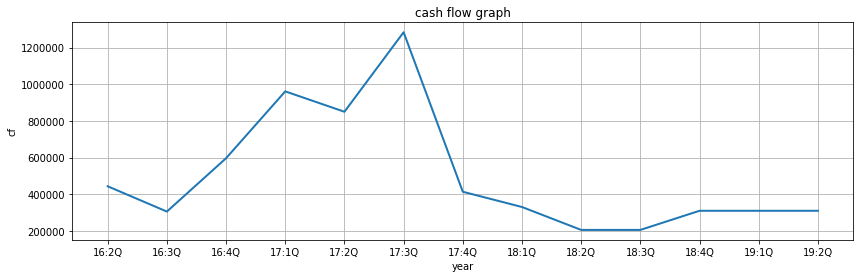

In [106]:
# cash flow 그래프
plt.xlabel("year")
plt.ylabel("cf")
plt.title("cash flow graph")
plt.plot(quarter, cf_list)

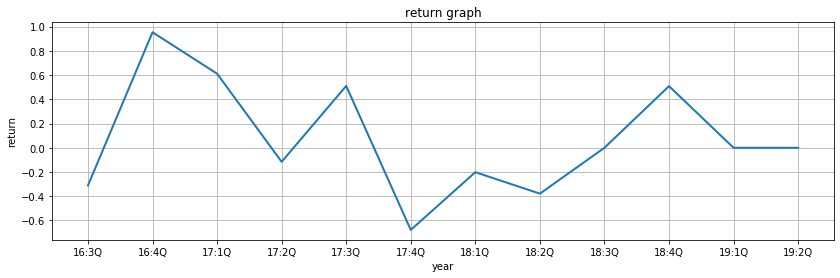

In [117]:
# 전달 기준 return 그래프

plt.xlabel("year")
plt.ylabel("return")
plt.title("return graph")
quarter_profit = quarter.copy()
quarter_profit.pop(0)
plt.plot(quarter_profit, profit)

In [118]:
cf_list_0 = [cf/cf_list[0] for cf in cf_list]

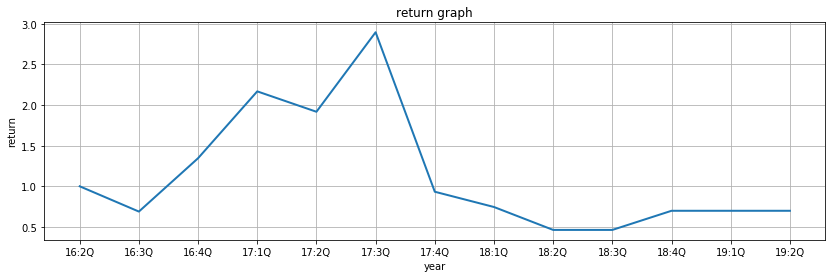

In [122]:
# 첫번째 달 기준 return 그래프
plt.xlabel("year")
plt.ylabel("return")
plt.title("return graph")
plt.plot(quarter, cf_list_0)